# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. 
To do this, 
* generate a random integer between one and three to represent the door hiding the car. 
* Then, generate a second integer between one and three representing the player's selection. 
* Then, of those the contestant did not choose, select a door concealing a goat to reveal. 

Record the results of the simulated game if they changed versus if they did not. 

Repeat this process a thousand (or more) times. 

Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(5)

In [118]:
doors = np.array([1, 2, 3])
switch_win = []
no_switch_win = []
n = 10**4

In [119]:
for i in range(n):
    car_location = np.random.randint(1, 4, 1)
    
    goats = np.delete(doors, np.where(doors == car_location))

    player_selection = np.random.randint(1, 4, 1)

    # the host selects one of the doors with a goat, that is not one the player chose   
    host_selection = np.random.choice(np.delete(goats, np.where(goats == player_selection)))

    
    # no switch 
    # the player chose the correct door on the first choice
    if player_selection == car_location:
        no_switch_win.append(1)
        switch_win.append(0)
        
    # switch 
    # the remaining door the correct choice
    remaining_door = np.delete(doors, np.where((doors == host_selection) | (doors == player_selection)))
    if car_location == remaining_door:
        no_switch_win.append(0)
        switch_win.append(1)
    
print(f'Total games {n}')
print(f'Wins with no switch {sum(no_switch_win)}, probability of winning {sum(no_switch_win) / n * 100}%')
print(f'Wins with a switch {sum(switch_win)}, probability of winning {sum(switch_win) / n * 100}%')
        



Total games 10000
Wins with no switch 3290, probability of winning 32.9%
Wins with a switch 6710, probability of winning 67.10000000000001%


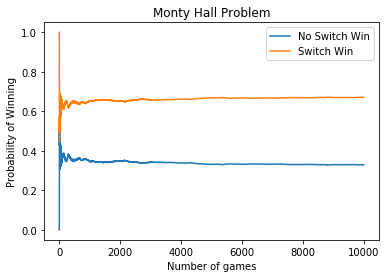

In [120]:
xs = range(1, n+1)
ys1 = [np.mean(no_switch_win[:i]) for i in range(1,n+1)]
plt.plot(xs, ys1, label='No Switch Win')

ys2 = [np.mean(switch_win[:i]) for i in range(1,n+1)]
plt.plot(xs, ys2, label='Switch Win')

plt.title('Monty Hall Problem')
plt.xlabel('Number of games')
plt.ylabel('Probability of Winning')
plt.legend()
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 